## This file makes machine learning application for individual packets for Aalto University. 
### Used machine learning algorithms: RF (Random Forest) DT (Decision Trees)

###  importing relevant libraries

In [27]:
%matplotlib inline
from numpy import array
from random import random
from sklearn import metrics
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB#57
from sklearn.naive_bayes import GaussianNB#52
from sklearn.naive_bayes import MultinomialNB#56
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

### Discovering dataset

In [28]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add
files_add=find_the_way('./dataset/','.csv')
files_add

['./dataset/Threshold_0.15.csv',
 './dataset/Threshold_0.175.csv',
 './dataset/IPAssess_CIC.csv',
 './dataset/threshold_0.15_ML.csv',
 './dataset/Threshold_0.172.csv',
 './dataset/threshold_0.175_ML.csv',
 './dataset/Main_ML.csv',
 './dataset/Main_CIC.csv',
 './dataset/Main1.csv',
 './dataset/Main.csv',
 './dataset/threshold_0.172_ML.csv']

### Discovering Labels

In [29]:
def target_names():
    name=files_add[2]
    print(name)
    df = pd.read_csv(name)  
    target_names=sorted(list(df[df.columns[-2]].unique()))
    return target_names
target_names=target_names()
len(target_names)

./dataset/IPAssess_CIC.csv


31

In [31]:
target_names

['AMCREST WIFi Camera',
 'Amazon Alexa Echo Dot 1',
 'Amazon Alexa Echo Studio',
 'Amazon Plug',
 'Atomi Coffee Maker',
 'D-Link DCHS-161 Water Sensor',
 'Eufy HomeBase 2',
 'Google Nest Mini',
 'Gosund ESP 039AAF Socket',
 'Gosund ESP 10098F Socket',
 'Gosund ESP 10ACD8 Plug',
 'Gosund ESP 1ACEE1 Socket',
 'Gosund ESP_032979 Plug',
 'Gosund ESP_0C3994 Plug',
 'Gosund ESP_147FF9 Plug',
 'HeimVision Smart WiFi Camera',
 'HeimVision SmartLife Radio/Lamp',
 'Home Eye Camera',
 'LG Smart TV',
 'Nest Indoor Camera',
 'Netatmo Camera',
 'Netatmo Weather Station',
 'Philips Hue Bridge',
 'Ring Base Station AC:1236',
 'Smart Board',
 'Sonos One Speaker',
 'Teckin Plug 1',
 'Teckin Plug 2',
 'Yutron Plug 1',
 'Yutron Plug 2',
 'iRobot Roomba']

### Hyperparameters of machine learning algorithms

In [32]:
ml_list={
"DT_r":DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
                       max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best'),  
 "Random Forest R":RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=27, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=69,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)}

### This part is the main part of the file. Cross-validates the respective datasets 10-time 10-fold and prints the results (general results, class-based results and confusion matrix).

Dataset         T   CV  ML alg  Acc   b_Acc Prec  Rec   F1    kap   tra-T    test-T  total   
et/IPAssess_CIC 0   1   DT_r    0.92  0.79  0.93  0.79  0.83  0.9   4.28     0.03    4.31    
et/IPAssess_CIC 0   2   DT_r    0.92  0.8   0.93  0.8   0.83  0.9   4.3      0.03    4.33    
et/IPAssess_CIC 0   3   DT_r    0.92  0.8   0.93  0.8   0.83  0.9   4.4      0.03    4.43    
et/IPAssess_CIC 0   4   DT_r    0.92  0.8   0.92  0.8   0.83  0.9   4.67     0.03    4.7     
et/IPAssess_CIC 0   5   DT_r    0.92  0.81  0.93  0.81  0.84  0.9   4.36     0.03    4.39    
et/IPAssess_CIC 0   6   DT_r    0.92  0.8   0.92  0.8   0.83  0.9   4.53     0.03    4.56    
et/IPAssess_CIC 0   7   DT_r    0.92  0.79  0.91  0.79  0.82  0.9   4.46     0.03    4.49    
et/IPAssess_CIC 0   8   DT_r    0.92  0.81  0.92  0.81  0.83  0.9   4.34     0.03    4.38    
et/IPAssess_CIC 0   9   DT_r    0.92  0.8   0.92  0.8   0.83  0.9   4.24     0.03    4.27    
et/IPAssess_CIC 0   10  DT_r    0.92  0.79  0.92  0.79  0.82

et/IPAssess_CIC 8   8   DT_r    0.92  0.79  0.93  0.79  0.82  0.9   4.73     0.03    4.77    
et/IPAssess_CIC 8   9   DT_r    0.92  0.79  0.93  0.79  0.82  0.9   4.89     0.04    4.93    
et/IPAssess_CIC 8   10  DT_r    0.92  0.8   0.92  0.8   0.83  0.9   4.7      0.03    4.73    
et/IPAssess_CIC 9   1   DT_r    0.92  0.8   0.92  0.8   0.83  0.9   4.7      0.04    4.75    
et/IPAssess_CIC 9   2   DT_r    0.92  0.8   0.93  0.8   0.83  0.9   4.75     0.04    4.79    
et/IPAssess_CIC 9   3   DT_r    0.92  0.8   0.91  0.8   0.82  0.9   4.69     0.03    4.72    
et/IPAssess_CIC 9   4   DT_r    0.92  0.79  0.91  0.79  0.82  0.9   4.67     0.03    4.7     
et/IPAssess_CIC 9   5   DT_r    0.92  0.8   0.93  0.8   0.83  0.9   4.55     0.03    4.58    
et/IPAssess_CIC 9   6   DT_r    0.92  0.8   0.93  0.8   0.83  0.9   4.75     0.04    4.79    
et/IPAssess_CIC 9   7   DT_r    0.92  0.8   0.92  0.8   0.82  0.9   4.73     0.04    4.76    
et/IPAssess_CIC 9   8   DT_r    0.92  0.8   0.93  0.8   0.83

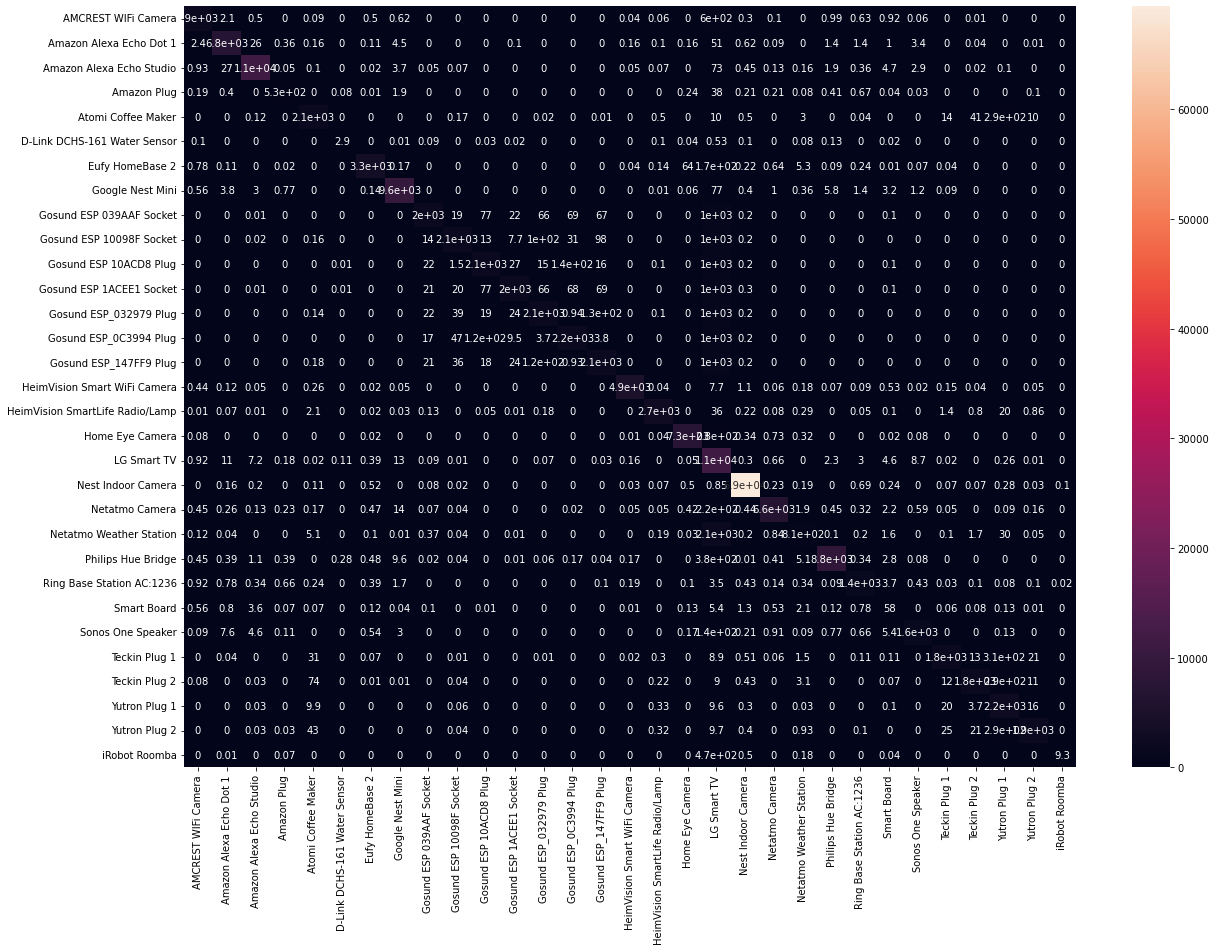





et/IPAssess_CIC 0   1   Random  0.92  0.79  0.92  0.79  0.82  0.9   83.37    3.11    86.48   
et/IPAssess_CIC 0   2   Random  0.92  0.81  0.93  0.81  0.84  0.9   81.02    3.03    84.05   
et/IPAssess_CIC 0   3   Random  0.92  0.81  0.92  0.81  0.84  0.9   84.14    3.18    87.32   
et/IPAssess_CIC 0   4   Random  0.92  0.79  0.92  0.79  0.82  0.9   82.32    3.06    85.39   
et/IPAssess_CIC 0   5   Random  0.92  0.8   0.91  0.8   0.83  0.9   82.8     3.12    85.92   
et/IPAssess_CIC 0   6   Random  0.92  0.79  0.92  0.79  0.82  0.9   84.25    3.29    87.54   
et/IPAssess_CIC 0   7   Random  0.92  0.8   0.92  0.8   0.83  0.9   81.6     3.06    84.66   
et/IPAssess_CIC 0   8   Random  0.92  0.8   0.92  0.8   0.83  0.9   82.09    2.95    85.04   
et/IPAssess_CIC 0   9   Random  0.92  0.79  0.92  0.79  0.82  0.9   83.54    3.15    86.69   
et/IPAssess_CIC 0   10  Random  0.92  0.81  0.92  0.81  0.84  0.9   81.79    3.28    85.07   
et/IPAssess_CIC 1   1   Random  0.92  0.8   0.93  0.8   

et/IPAssess_CIC 8   9   Random  0.92  0.81  0.92  0.81  0.84  0.9   55.7     2.1     57.8    
et/IPAssess_CIC 8   10  Random  0.92  0.79  0.92  0.79  0.82  0.9   56.26    2.11    58.37   
et/IPAssess_CIC 9   1   Random  0.92  0.81  0.92  0.81  0.83  0.9   55.07    2.11    57.18   
et/IPAssess_CIC 9   2   Random  0.92  0.79  0.91  0.79  0.82  0.9   55.56    2.1     57.65   
et/IPAssess_CIC 9   3   Random  0.92  0.81  0.92  0.81  0.83  0.9   56.18    2.09    58.26   
et/IPAssess_CIC 9   4   Random  0.92  0.81  0.91  0.81  0.83  0.9   54.95    2.09    57.03   
et/IPAssess_CIC 9   5   Random  0.92  0.81  0.92  0.81  0.83  0.9   55.74    2.11    57.85   
et/IPAssess_CIC 9   6   Random  0.92  0.79  0.92  0.79  0.82  0.9   55.46    2.1     57.56   
et/IPAssess_CIC 9   7   Random  0.92  0.79  0.93  0.79  0.83  0.9   55.56    2.12    57.68   
et/IPAssess_CIC 9   8   Random  0.92  0.8   0.93  0.8   0.83  0.9   56.43    2.1     58.53   
et/IPAssess_CIC 9   9   Random  0.92  0.78  0.92  0.78  0.81

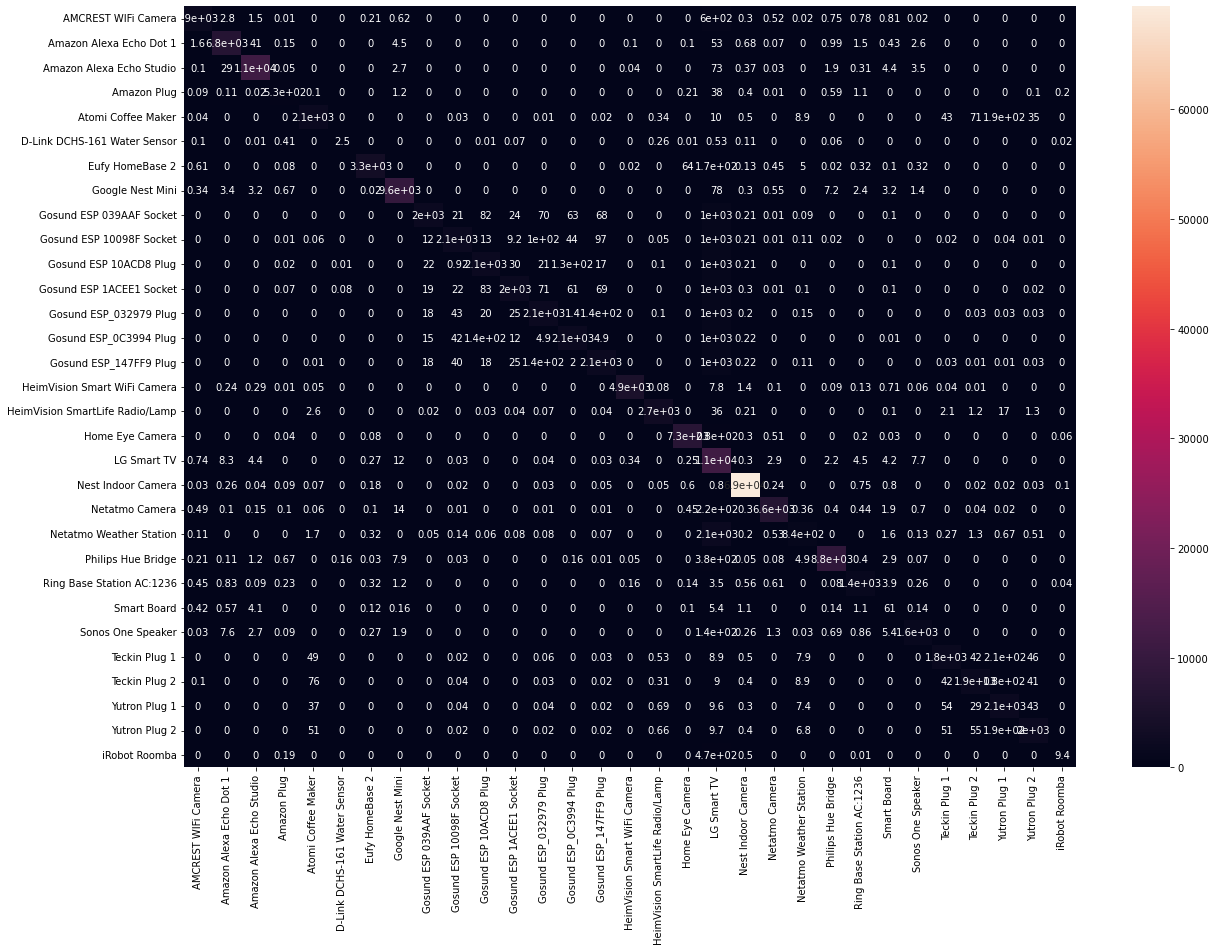

In [33]:
ths = open("dataset/IPAssess_ML.csv", "w")
ths.write("Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision, Recall , F1-score, kappa ,tra-Time,test-Time,total-Time))\n")
repetition=10


from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import Normalizer
print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s'%
           ("Dataset","T","CV","ML alg","Acc","b_Acc","Prec", "Rec" , "F1", "kap" ,"tra-T","test-T","total"))
curr_file=[]
curr_file.append(files_add[2])
for loop in curr_file:
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        for i in range(repetition):
            rnd = random()
            kfold = KFold(n_splits=10, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop)#,header=None )
            del df["MAC"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
          
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes 
           
#             scaler = Normalizer().fit(X)
#             X = scaler.transform(X)
#             summarize transformed data
            dname=loop[7:-4]
            X.shape
            for train_index, test_index in kfold.split(X):
                results_y=[]
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]  
                cv+=1
                results_y.append(y_test)


                precision=[]
                recall=[]
                f1=[]
                accuracy=[]
                train_time=[]
                test_time=[]
                total_time=[]
                kappa=[]
                accuracy_b=[]
                    #machine learning algorithm is applied in this section
                clf = ml_list[ii]#choose algorithm from ml_list dictionary
                second=time.time()
                clf.fit(X_train, y_train)
                train_time.append(float((time.time()-second)) )
                second=time.time()
                predict =clf.predict(X_test)
                test_time.append(float((time.time()-second)) )

                rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
                pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
                f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")        

                report = classification_report(y_test, predict, target_names=target_names,output_dict=True)
                cr = pd.DataFrame(report).transpose()
                if class_based_results.empty:
                    class_based_results =cr
                else:
                    class_based_results = class_based_results.add(cr, fill_value=0)
                precision.append(float(pr))
                recall.append(float(rc))
                f1.append(float(f_1))
                accuracy_b.append(balanced_accuracy_score( y_test,predict))
                accuracy.append(accuracy_score(y_test, predict))
                #clf.score(X_test, y_test))
                #print(balanced_accuracy_score( y_test,predict))
                #t_time.append(float((time.time()-second)) )
                kappa.append(round(float(sklearn.metrics.cohen_kappa_score(y_test, predict, 
                labels=None, weights=None, sample_weight=None)),15))
                print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s' % (dname,i,cv,ii[0:6],str(round(np.mean(accuracy),2)),str(round(np.mean(accuracy_b),2)),
                    str(round(np.mean(precision),2)), str(round(np.mean(recall),2)),str(round(np.mean(f1),2)), 
                    str(round(np.mean(kappa),2)),str(round(np.mean(train_time),2)),str(round(np.mean(test_time),2)),str(round(np.mean(test_time)+np.mean(train_time),2))))
                lines=(str(dname)+","+str(i)+","+str(cv)+","+str(ii)+","+str(round(np.mean(accuracy),15))+","+str(round(np.mean(accuracy_b),15))+","+str(round(np.mean(precision),15))+","+ str(round(np.mean(recall),15))+","+str(round(np.mean(f1),15))+","+str(round(np.mean(kappa),15))+","+str(round(np.mean(train_time),15))+","+str(round(np.mean(test_time),15))+","+str(round(np.mean(test_time)+np.mean(train_time),15))+"\n")

                ths.write (lines)

                df_cm = pd.DataFrame(confusion_matrix(y_test, predict))
                results_y.append(predict)
                if cm.empty:
                    cm =df_cm
                else:
                    cm = cm.add(df_cm, fill_value=0)
 
        print(class_based_results/100) 
        cm=cm/100
        graph_name="confusion matrix" +str(ii)       
        plt.figure(figsize = (20,14))
        sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names, annot=True)
        plt.savefig(graph_name+'IPAssess',bbox_inches='tight',format='png')#, dpi=400)
        plt.show()
        #print(cm)
        print("\n\n\n") 
ths.close()  

In [34]:
df = pd.read_csv("dataset/IPAssess_ML.csv")
df 

,Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision,Recall,F1-score,kappa,tra-Time,test-Time,total-Time))
0,et/IPAssess_CIC,0,1,DT_r,0.917915,0.791691,0.928876,0.791691,0.825206,0.902161,4.279722,0.033905,4.313627
1,et/IPAssess_CIC,0,2,DT_r,0.917380,0.801148,0.927979,0.801148,0.830547,0.901666,4.296391,0.031068,4.327459
2,et/IPAssess_CIC,0,3,DT_r,0.917799,0.803682,0.931651,0.803682,0.834213,0.902245,4.399491,0.033688,4.433179
3,et/IPAssess_CIC,0,4,DT_r,0.917237,0.798735,0.919633,0.798735,0.826936,0.901522,4.665836,0.030425,4.696261
4,et/IPAssess_CIC,0,5,DT_r,0.918859,0.813889,0.931808,0.813889,0.841347,0.903497,4.357742,0.029329,4.387071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,et/IPAssess_CIC,9,6,Random Forest R,0.917502,0.789955,0.924191,0.789955,0.820524,0.901896,55.464769,2.097828,57.562597
196,et/IPAssess_CIC,9,7,Random Forest R,0.918387,0.792923,0.926196,0.792923,0.826200,0.902834,55.555584,2.123196,57.678780
197,et/IPAssess_CIC,9,8,Random Forest R,0.915842,0.795801,0.926264,0.795801,0.828184,0.899627,56.431460,2.096537,58.527997
198,et/IPAssess_CIC,9,9,Random Forest R,0.917449,0.782745,0.920332,0.782745,0.814978,0.901812,57.566266,2.077806,59.644072


In [35]:
df1=df[df['ML algorithm']=='DT_r']
print(f'Accuracy: {df1["Acc"].mean()}')
print(f'Test-Time: {df1["test-Time"].mean()}')
print(f'Train-Time: {df1["total-Time))"].mean()}')
df1

Accuracy: 0.917681926576131
Test-Time: 0.034218404293060285
Train-Time: 4.803983376026154


,Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision,Recall,F1-score,kappa,tra-Time,test-Time,total-Time))
0,et/IPAssess_CIC,0,1,DT_r,0.917915,0.791691,0.928876,0.791691,0.825206,0.902161,4.279722,0.033905,4.313627
1,et/IPAssess_CIC,0,2,DT_r,0.917380,0.801148,0.927979,0.801148,0.830547,0.901666,4.296391,0.031068,4.327459
2,et/IPAssess_CIC,0,3,DT_r,0.917799,0.803682,0.931651,0.803682,0.834213,0.902245,4.399491,0.033688,4.433179
3,et/IPAssess_CIC,0,4,DT_r,0.917237,0.798735,0.919633,0.798735,0.826936,0.901522,4.665836,0.030425,4.696261
4,et/IPAssess_CIC,0,5,DT_r,0.918859,0.813889,0.931808,0.813889,0.841347,0.903497,4.357742,0.029329,4.387071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,et/IPAssess_CIC,9,6,DT_r,0.917067,0.801550,0.928200,0.801550,0.831123,0.901312,4.751206,0.035882,4.787088
96,et/IPAssess_CIC,9,7,DT_r,0.917173,0.795396,0.915291,0.795396,0.821932,0.901593,4.727862,0.036959,4.764821
97,et/IPAssess_CIC,9,8,DT_r,0.918000,0.801345,0.929261,0.801345,0.832380,0.902349,4.638579,0.029771,4.668350
98,et/IPAssess_CIC,9,9,DT_r,0.917369,0.811671,0.929203,0.811671,0.837053,0.901654,4.940234,0.036774,4.977008


In [36]:
df2=df[df['ML algorithm']=='Random Forest R']
print(f'Accuracy: {df2["Acc"].mean()}')
print(f'Test-Time: {df2["test-Time"].mean()}')
print(f'Train-Time: {df2["total-Time))"].mean()}')
df2

Accuracy: 0.9172650084163275
Test-Time: 2.463792767524719
Train-Time: 68.16851371765136


,Dataset,T,CV,ML algorithm,Acc,b_Acc,Precision,Recall,F1-score,kappa,tra-Time,test-Time,total-Time))
100,et/IPAssess_CIC,0,1,Random Forest R,0.917889,0.789138,0.919125,0.789138,0.819250,0.902195,83.374734,3.106301,86.481035
101,et/IPAssess_CIC,0,2,Random Forest R,0.918074,0.810524,0.926837,0.810524,0.837973,0.902437,81.021987,3.027114,84.049101
102,et/IPAssess_CIC,0,3,Random Forest R,0.917348,0.808564,0.924893,0.808564,0.836315,0.901735,84.138990,3.180190,87.319180
103,et/IPAssess_CIC,0,4,Random Forest R,0.916542,0.786519,0.921717,0.786519,0.817724,0.900644,82.323155,3.063027,85.386182
104,et/IPAssess_CIC,0,5,Random Forest R,0.916749,0.798653,0.909921,0.798653,0.825101,0.901095,82.801737,3.119872,85.921609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,et/IPAssess_CIC,9,6,Random Forest R,0.917502,0.789955,0.924191,0.789955,0.820524,0.901896,55.464769,2.097828,57.562597
196,et/IPAssess_CIC,9,7,Random Forest R,0.918387,0.792923,0.926196,0.792923,0.826200,0.902834,55.555584,2.123196,57.678780
197,et/IPAssess_CIC,9,8,Random Forest R,0.915842,0.795801,0.926264,0.795801,0.828184,0.899627,56.431460,2.096537,58.527997
198,et/IPAssess_CIC,9,9,Random Forest R,0.917449,0.782745,0.920332,0.782745,0.814978,0.901812,57.566266,2.077806,59.644072
